# Gold Price Prediction 💰

In this Jupyter notebook, predictive analytics study was performed on a given data set which consists of the troy ounce gold prices over time horizon.

The breakdown of the study is as below:

<ul>
<li>Raw data extraction</li>
<li>Data transformation</li>
<li>Data visualization</li>
<li>Model construction</li>
<li>Performance evaluation</li>
<li>Model improvement</li>
</ul>

Data Source: "https://www.kaggle.com/datasets/psycon/daily-gold-price-historical-data"

In [7]:
import warnings
warnings.filterwarnings('ignore')

import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.optimize import curve_fit

### Data Exploration

In [8]:
# create a dataset from source csv file
RawData = pandas.read_csv('gold.csv')
# view some rows of the dataset
RawData.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2,2000-01-06,281.6,282.8,280.2,282.4,19055,USD
3,2000-01-07,282.5,284.5,282.0,282.9,11266,USD
4,2000-01-10,282.4,283.9,281.8,282.7,30603,USD


In [9]:
# get information about the dataset
RawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703 entries, 0 to 5702
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5703 non-null   object 
 1   Open      5703 non-null   float64
 2   High      5703 non-null   float64
 3   Low       5703 non-null   float64
 4   Close     5703 non-null   float64
 5   Volume    5703 non-null   int64  
 6   Currency  5703 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 312.0+ KB


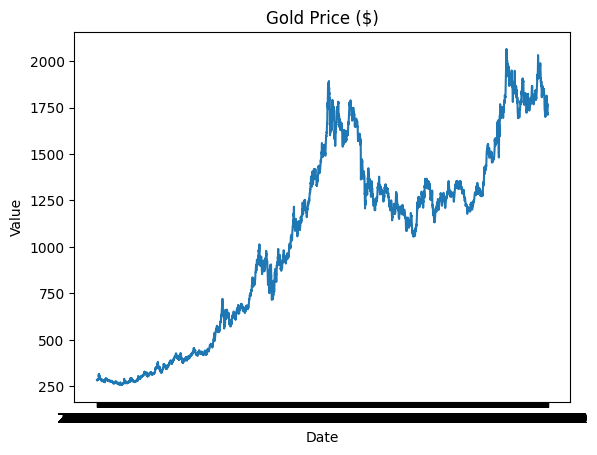

In [10]:
# calculate an atomic value that represents the daily gold price
Dataset = RawData
Dataset['Value'] = (Dataset['High'] + Dataset['Low']) / 2
Dataset = Dataset[['Date', 'Value']]
# plot line chart to visualize data
pyplot.plot(Dataset['Date'], Dataset['Value'])
pyplot.xlabel("Date")
pyplot.ylabel("Value")
pyplot.title("Gold Price ($)")
pyplot.show()

### Linear Regression

It is obvious that time series forecasting methods should be used in this case. As it can be seen on the line chart above, the gold prices have positive trend since 2000. Hence regression model is a good method to make predictions

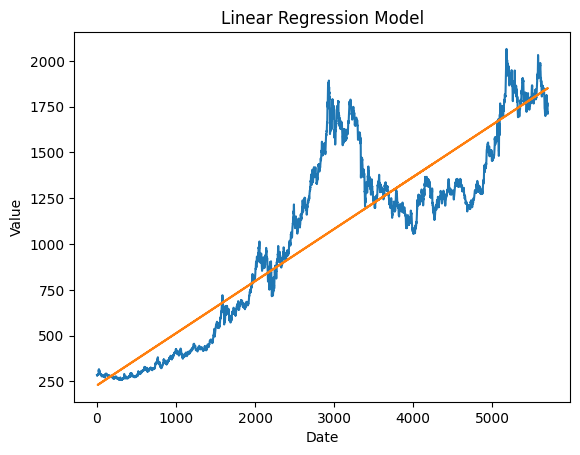

intercept: [228.06152122]
slope: [[0.28466774]]


Mean Absolute Error:  170.8953742315171
R-Squared:  0.7975799189416348


      Actual Data  Predicted Data
0         1302.00     1434.198723
1         1775.35     1141.560289
2          907.50      825.863769
3          291.55      353.884661
4         1583.60     1112.239512
...           ...             ...
1136      1244.30     1222.690594
1137       701.15      679.544552
1138      1223.75     1390.929227
1139      1312.10     1540.664456
1140      1389.10     1186.537792

[1141 rows x 2 columns]


In [11]:
# transform data set date values to time series indices
def TransformDateToIndex():
    counter = 1
    for x in Dataset['Date']:
        Dataset['Date'].iat[counter - 1] = counter
        counter = counter + 1
TransformDateToIndex()

# reshape dataset axes in order to make regression properly
X_values = Dataset['Date'].values.reshape(-1, 1)
Y_values = Dataset['Value'].values.reshape(-1, 1)

# split the dataset for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size = 0.2)

# create linear regression instance
regression = LinearRegression()

# fit linear regression line using training data
regression.fit(X_train, Y_train)

# make predictions from independent test variable
Y_pred = regression.predict(X_test)

# visualize raw data and regression model on same graph
pyplot.plot(Dataset['Date'], Dataset['Value'])
pyplot.plot(X_test, Y_pred)
pyplot.title("Linear Regression Model")
pyplot.xlabel("Date")
pyplot.ylabel("Value")
pyplot.show()

# show intercept value of regression line
print("intercept:", regression.intercept_)

# show slope value of regression line
print("slope:", regression.coef_)
print("\n")

# show forecasting model metrics for performance evaluation
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, Y_pred))
print("R-Squared: ", metrics.r2_score(Y_test, Y_pred))
print("\n")

# show actual test data and predicted data
ResultsDataFrame = pandas.DataFrame({'Actual Data' : Y_test.squeeze(), 'Predicted Data' : Y_pred.squeeze()})
print(ResultsDataFrame)

R Squared value of the linear regression model shows that the model can explain approximately %80 of the variation in gold prices. 

### Polynomial Regression

As it mentioned before, the gold price data is trending. Moreover it show some curves throughout the time axis. İn order to improve the efficiency of the forecasting model, curvilinear effects should be taken into account in the model.

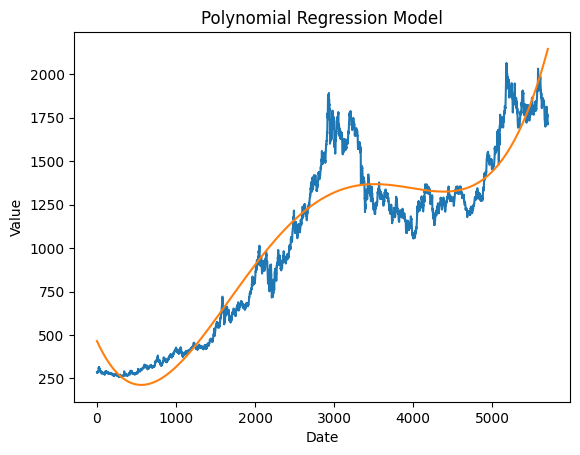

Mean Absolute Error:  117.99777921632938
R-Squared:  0.9118557242166528


Next Prediction:  2146.249329296319


      Actual Data Predicted Data
0          284.75      464.98855
1          283.00     463.998862
2          281.50     463.011445
3          283.25     462.026297
4          282.85     461.043415
...           ...            ...
5698      1744.65    2139.510769
5699      1742.85    2141.191835
5700      1729.30    2142.875282
5701      1711.05    2144.561113
5702      1718.25    2146.249329

[5703 rows x 2 columns]


In [12]:
# define mapping function
def Mapping(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4
    
# call curve_fit function in order to find optimal values of model parameters
OptimizedParameters, _ = curve_fit(Mapping, Dataset['Date'], Dataset['Value'])

a, b, c, d, e= OptimizedParameters

Predictions = Mapping(Dataset['Date'], a, b, c, d, e)

# visualize raw data and regression model on same graph
pyplot.plot(Dataset['Date'], Dataset['Value'])
pyplot.plot(Dataset['Date'], Predictions)
pyplot.title("Polynomial Regression Model")
pyplot.xlabel("Date")
pyplot.ylabel("Value")
pyplot.show()

# show model metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(Dataset['Value'], Predictions))
print("R-Squared: ", metrics.r2_score(Dataset['Value'], Predictions))
print("\n")

# show next prediction
print("Next Prediction: ", Mapping(len(Dataset), a, b, c, d, e))
print("\n")

# show actual test data and predicted data
TestResultsDataFrame = pandas.DataFrame({'Actual Data' : Dataset['Value'], 'Predicted Data' : Predictions})
print(TestResultsDataFrame)


R Squared value of the polynomial regression model show that the model can explain approximately %90 of the variation in gold prices. Also the error measurement is reduced. That refers to an improvement in the predictive model.